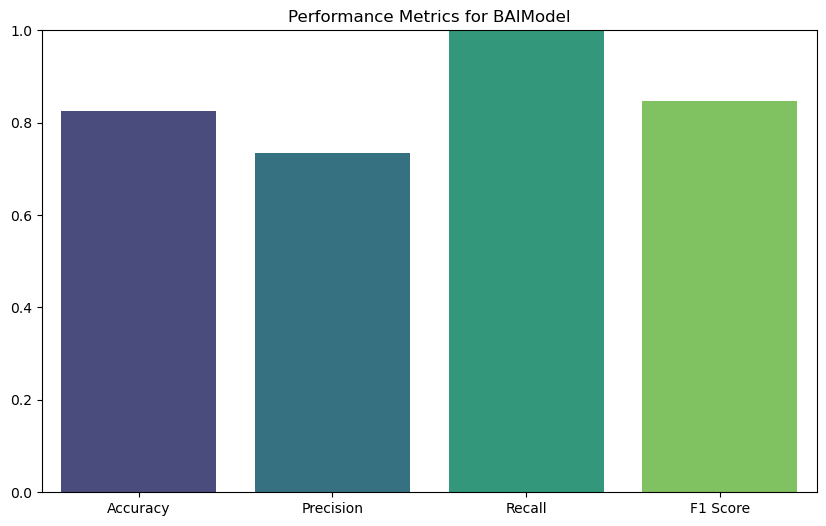

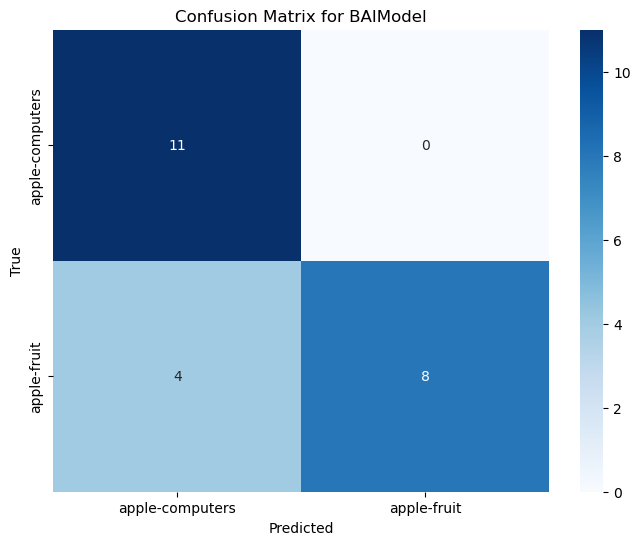

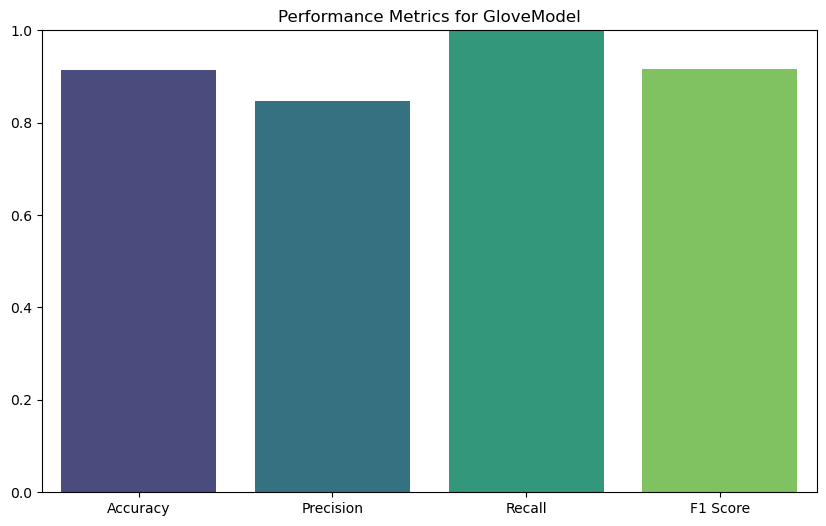

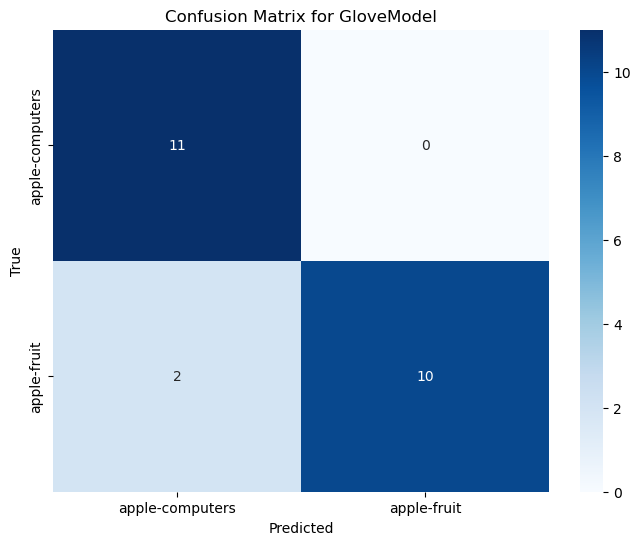

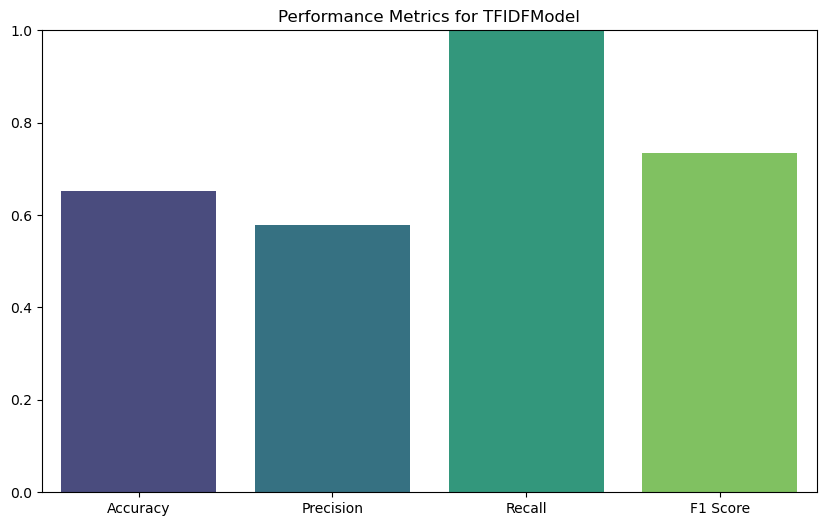

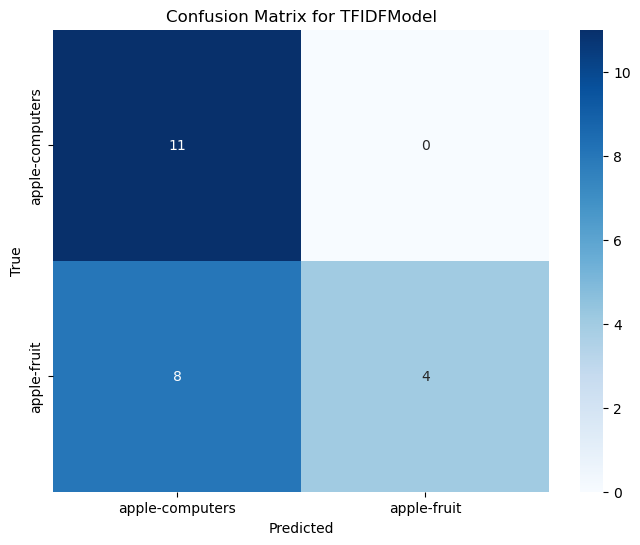

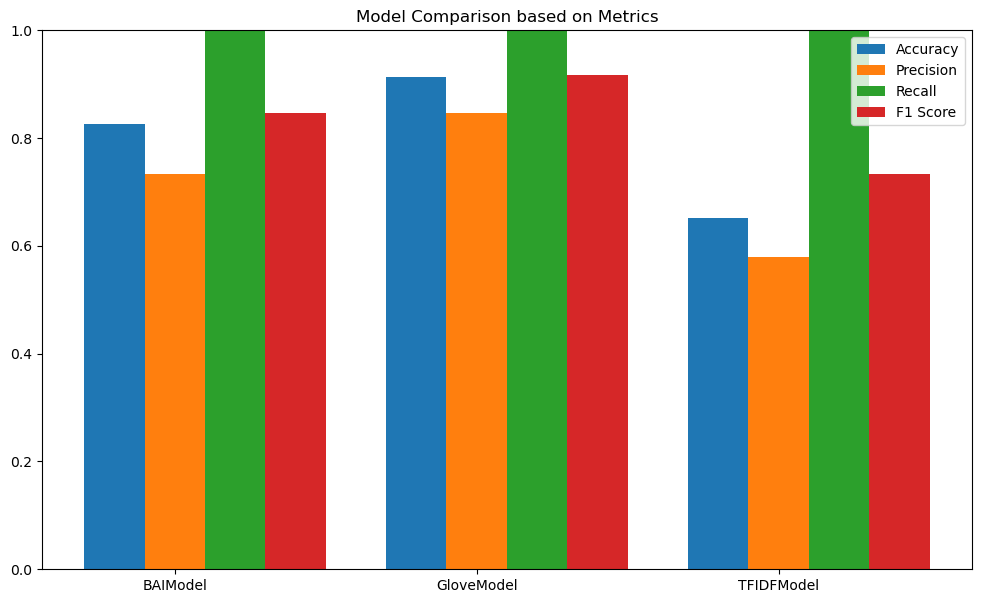

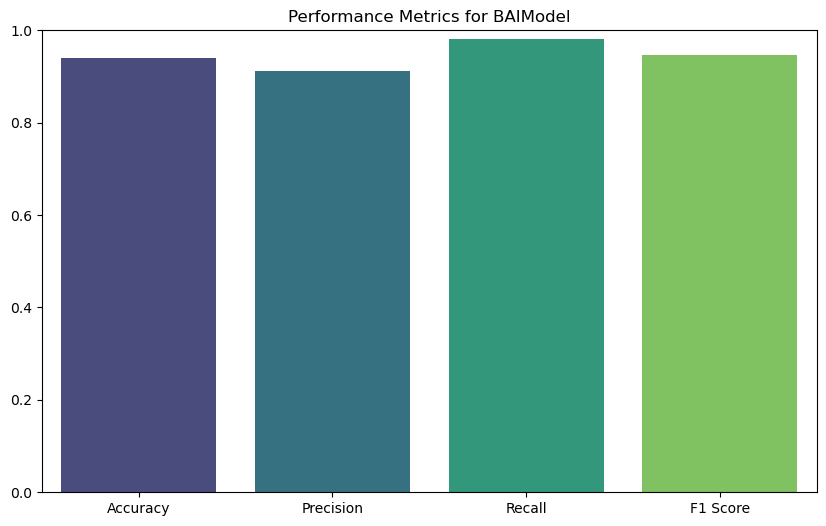

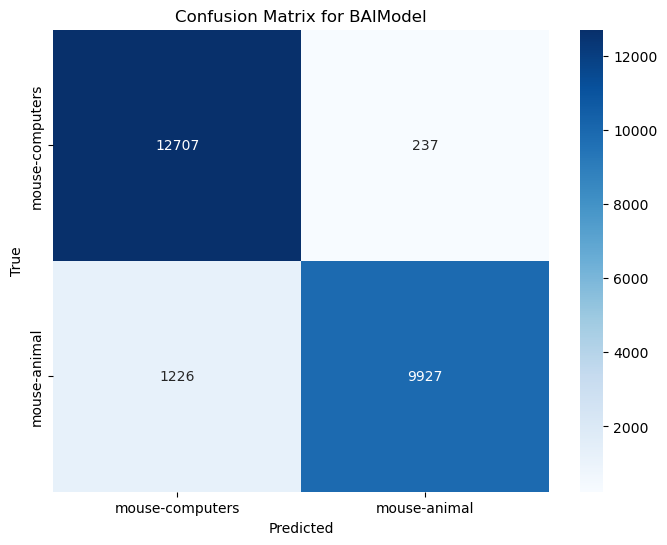

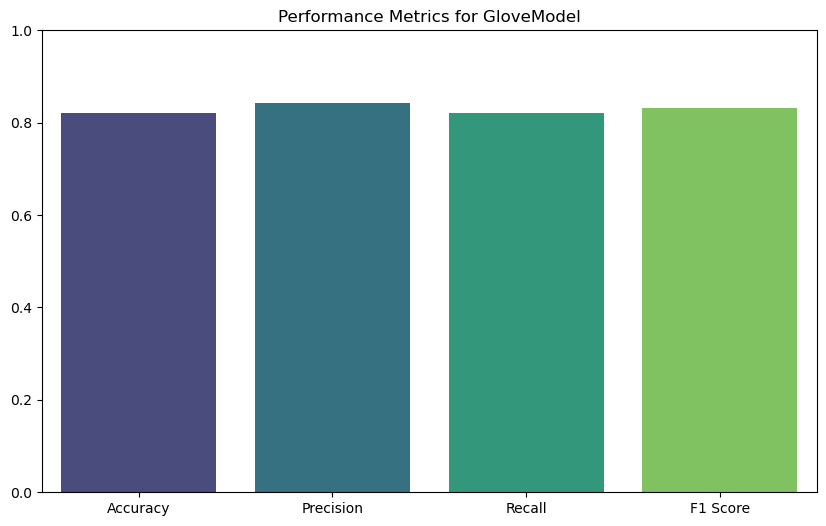

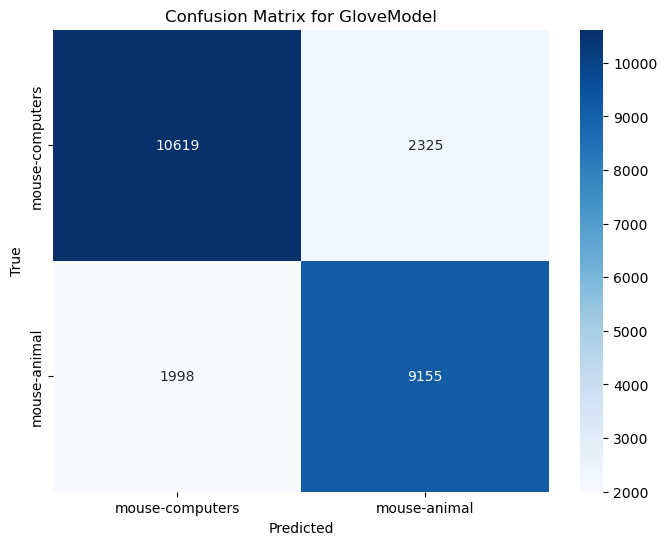

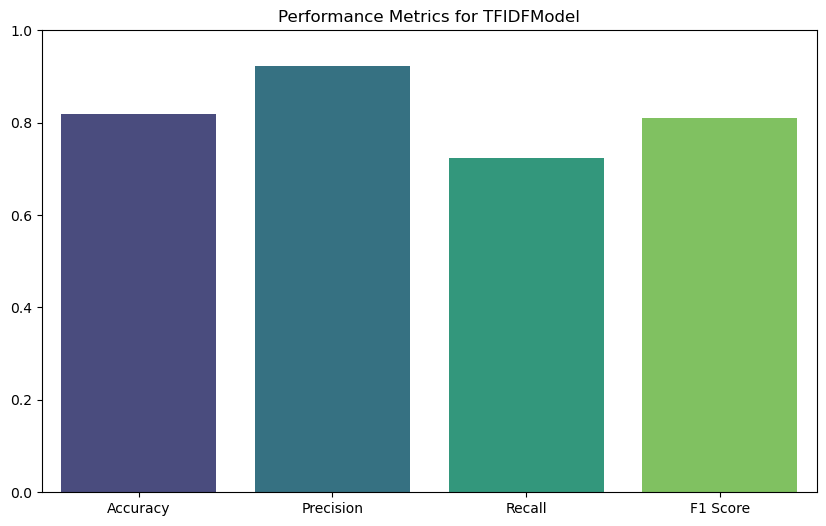

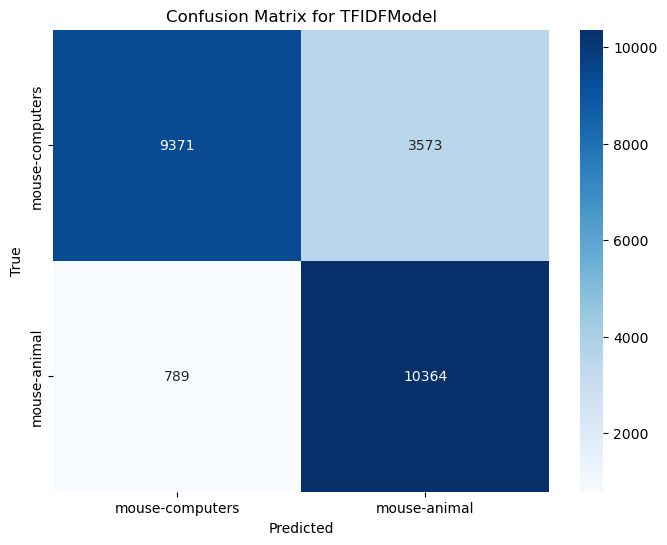

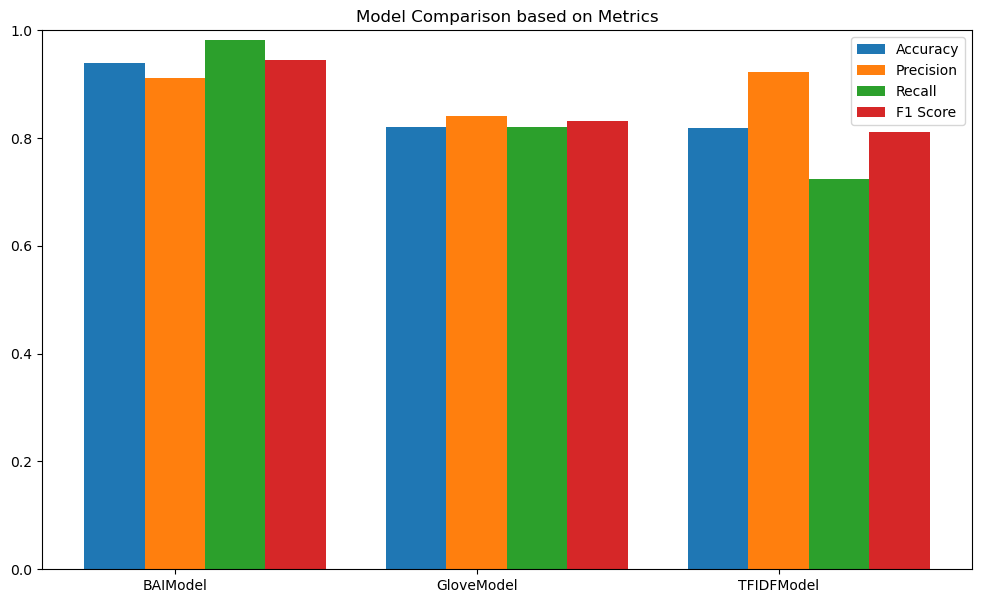

In [1]:
from models import BAIModel, GloveModel, TFIDFModel
from utils import read_and_split_content, extract_categories_from_filenames
from charts import compute_metrics, plot_performance_bar, plot_confusion_matrix, plot_all_models_comparison

def process_files(filename1, filename2):
    category1, category2 = extract_categories_from_filenames(filename1, filename2)

    train_data1, test_data1 = read_and_split_content(filename1)
    train_data2, test_data2 = read_and_split_content(filename2)

    models = [BAIModel(), GloveModel(), TFIDFModel()]

    ground_truth = [category1]*len(test_data1) + [category2]*len(test_data2)
    test_data = test_data1 + test_data2

    models_metrics = {}
    for model in models:
        train_embeddings = model.load_embeddings(train_data1, train_data2)
        results = model.classify(test_data, train_embeddings, category1, category2)
        model_name = model.__class__.__name__

        metrics_values = compute_metrics(ground_truth, results, category1)
        models_metrics[model_name] = metrics_values

        plot_performance_bar(metrics_values, model_name)
        plot_confusion_matrix(ground_truth, results, model_name, category1, category2)

    plot_all_models_comparison(models_metrics)

# File pairs
file_pairs = [
    ("apple-computers.txt", "apple-fruit.txt"),
    ("mouse-computers.txt", "mouse-animal.txt")
]

for f1, f2 in file_pairs:
    process_files(f1, f2)